---
title: "Lab Project AYA"
author: "Safia safa-tahar-henni"
date: "January 28, 2019"

---

# AYA Project

Les donnees proviennent de plusieurs sources:
* Leucegene:
500 patients dont 80 AYA
donnees:  p-value analyse expression differentielle
non normalise 
analyse avec DeSeq2
* TGCA: ~ 200 adultes
* Target (https://ocg.cancer.gov/programs/target/projects/acute-myeloid-leukemia):
Les chercheurs de TARGET analysent les tumeurs de patients pediatriques, dont beaucoup ont fait une rechute, afin d'identifier des biomarqueurs en correlation avec de mauvais resultats cliniques et / ou de nouvelles approches therapeutiques pour traiter la LMA chez l'enfant. (200 patients)


But : Analyse expression differentielle, mettre en evidence des genes specifique aux Adolescents et jeunes Adultes (18-40 ans).



In [120]:
#if (!requireNamespace("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")
#BiocManager::install("DESeq2", version = "3.8")
library("DESeq2")
#BiocManager::install("genefilter", version = "3.8")
library(genefilter)

In [121]:
library('plyr') #package pour table de comptage
library(magrittr)
library("varhandle")
#library(tidyr)

## Repartition des echantillons selon leurs caracteristiques cliniques

In [122]:
data_API = read.csv("/home/safia/Documents/AYA/Leucegene risk complete.txt",header = T,sep = "\t")
data_API<- data.frame(data_API[,-1], row.names=data_API[,1])

t_data_API = as.data.frame(t(data_API)) # inverse colonne ligne
colnames(t_data_API) <- gsub(" ","_",colnames(t_data_API)) # remplace les espaces dans le nom des colonnes
t_data_API <- head(t_data_API, -1) # supprimme la deriniere ligne data_type 

inf_40 = t_data_API[which(as.integer(t_data_API$Age_at_diagnosis)<=40),]
data_AYA = inf_40[which(as.integer(inf_40$Age_at_diagnosis)>=18),]

### Cytogenetic risk

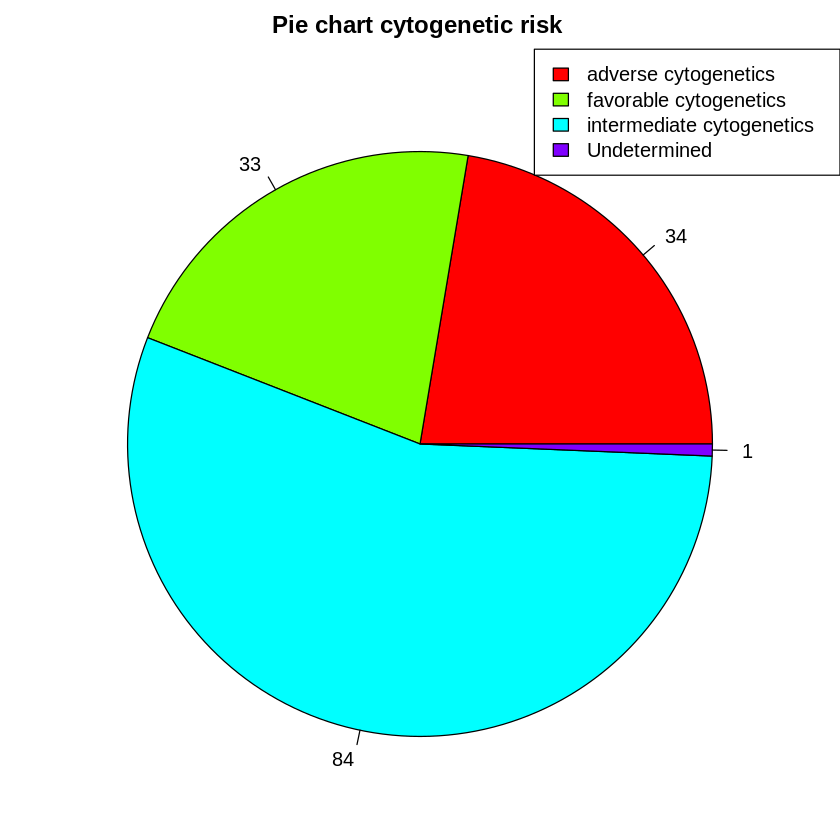

In [123]:

# count table
count_cytogenetic_risk = count(data_AYA,"cytogenetic_risk " )

# Pie chart
par(xpd=TRUE, mar=c(0,0,2,0))
pie(count_cytogenetic_risk$freq, main = "Pie chart cytogenetic risk ",labels = count_cytogenetic_risk$freq, col = rainbow(length(count_cytogenetic_risk$freq)))
legend("topright",legend = count_cytogenetic_risk$cytogenetic_risk, cex = 1,ncol = 1,
       fill = rainbow(length(count_cytogenetic_risk$freq)),xpd=NA)


### Cytogenetic subgroup

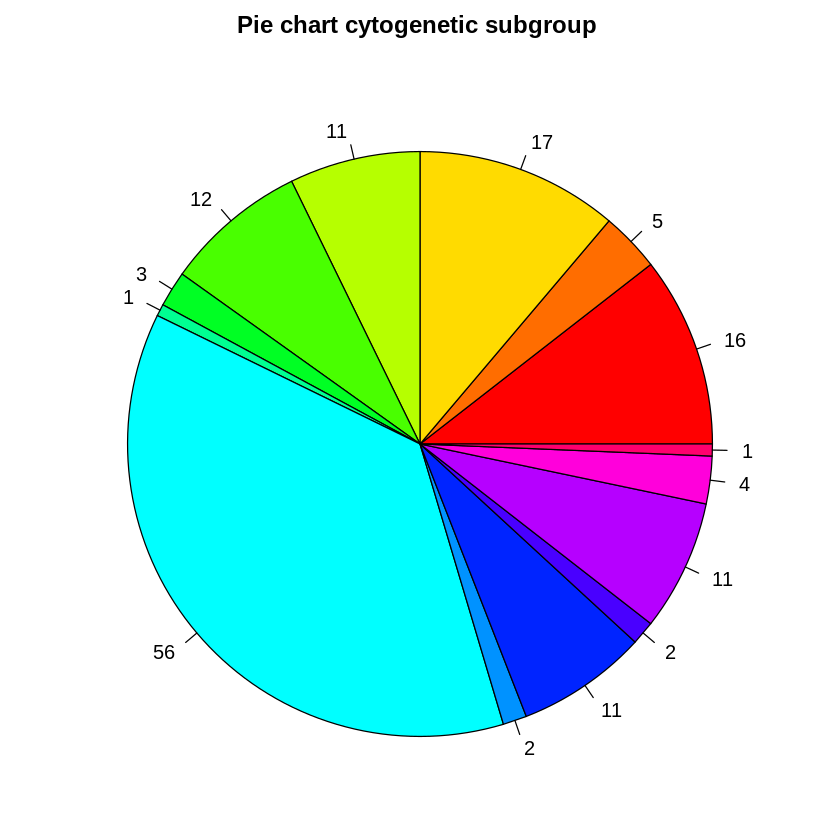

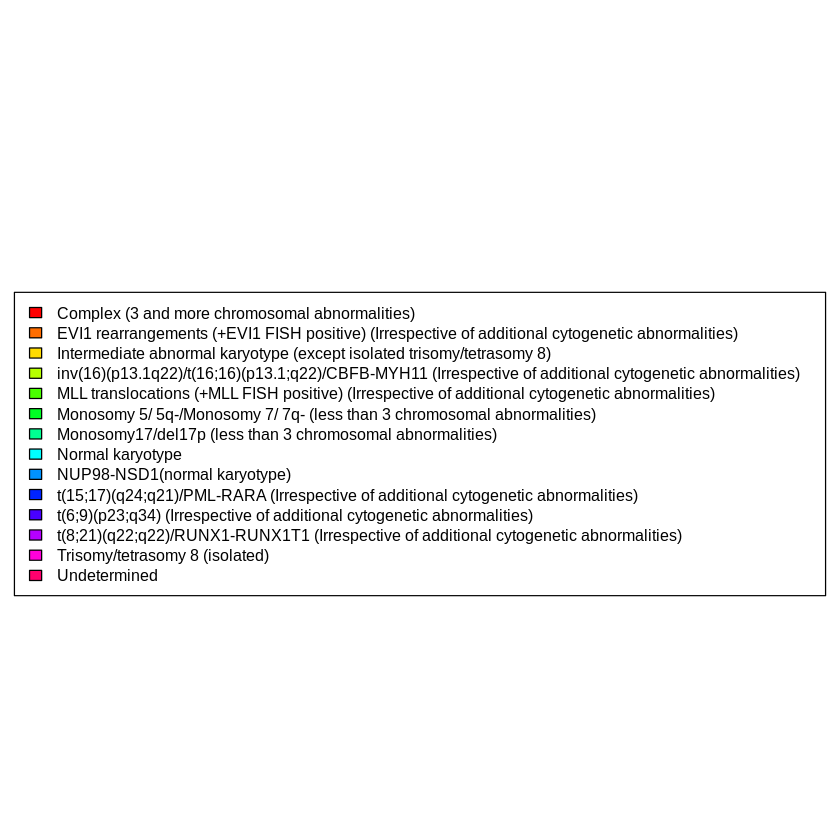

In [124]:
# count table
count_cytogenetic_subgroup = count(data_AYA, "cytogenetic_subgroup")

# Pie chart
par(xpd=TRUE, mar=c(0,0,2,0))
pie(count_cytogenetic_subgroup$freq, main = "Pie chart cytogenetic subgroup ",labels = count_cytogenetic_subgroup$freq, col = rainbow(length(count_cytogenetic_subgroup$freq)))

plot(1,type="n",axes=FALSE,xlab="",ylab="")
legend("center",legend = count_cytogenetic_subgroup$cytogenetic_subgroup, cex = 0.8,ncol = 1,
       fill = rainbow(length(count_cytogenetic_subgroup$freq)),xpd=NA)


### Subgroup

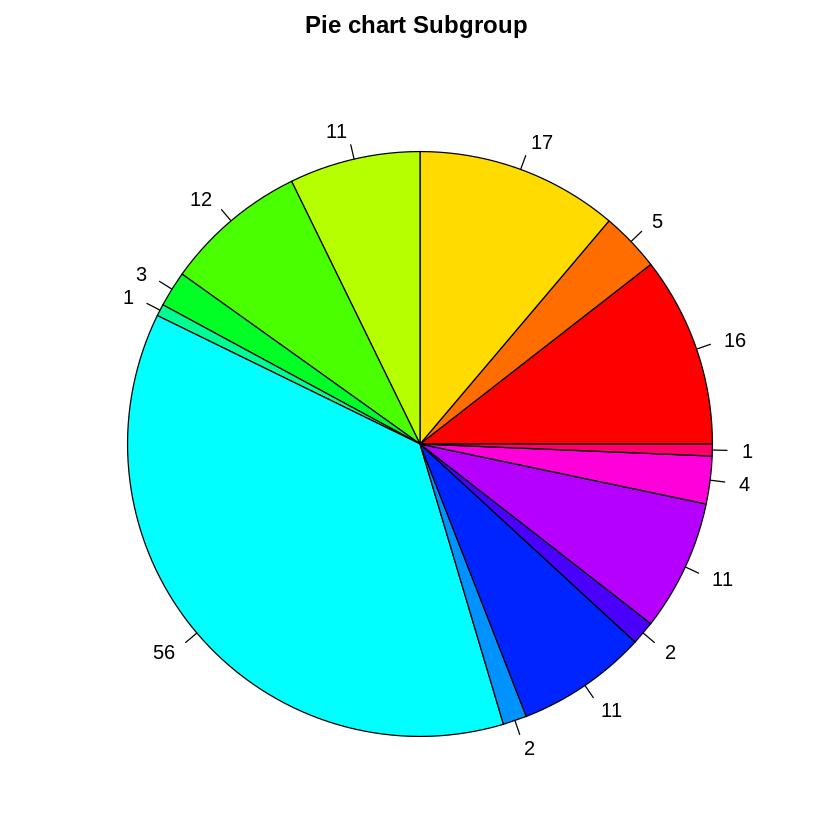

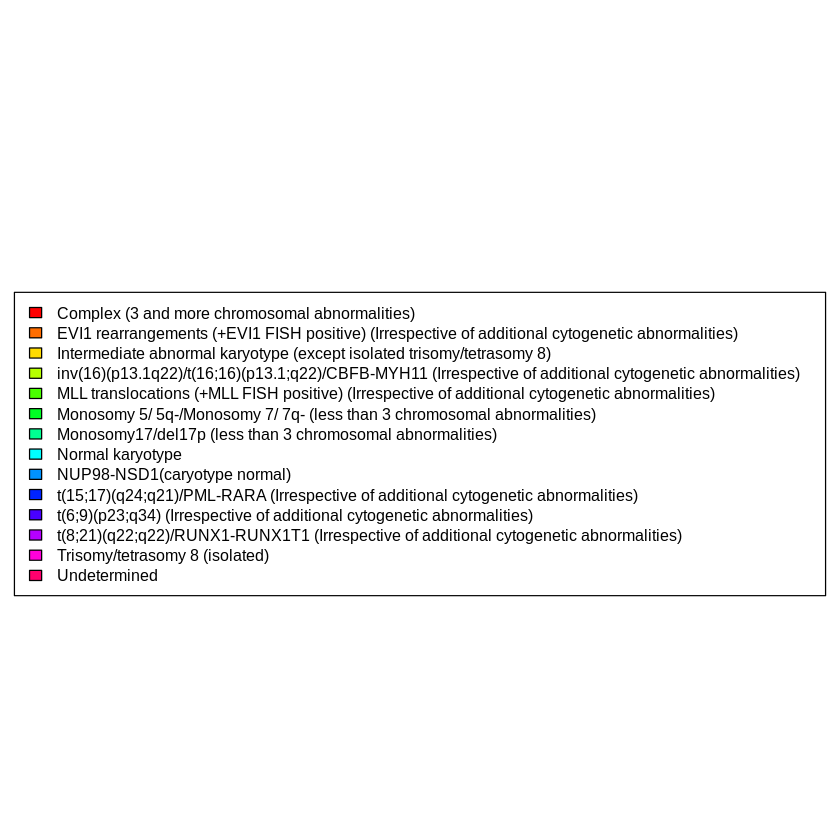

In [125]:
# count table
count_Subgroup = count(data_AYA, "Subgroup")

# Pie chart
par(xpd=TRUE, mar=c(0,0,2,0))
pie(count_Subgroup$freq, main = "Pie chart Subgroup ",labels = count_Subgroup$freq, col = rainbow(length(count_Subgroup$freq)))

plot(1,type="n",axes=FALSE,xlab="",ylab="")
legend("center",legend = count_Subgroup$Subgroup, cex = 0.8,ncol = 1,
       fill = rainbow(length(count_Subgroup$freq)),xpd=NA)

### WHO 2008

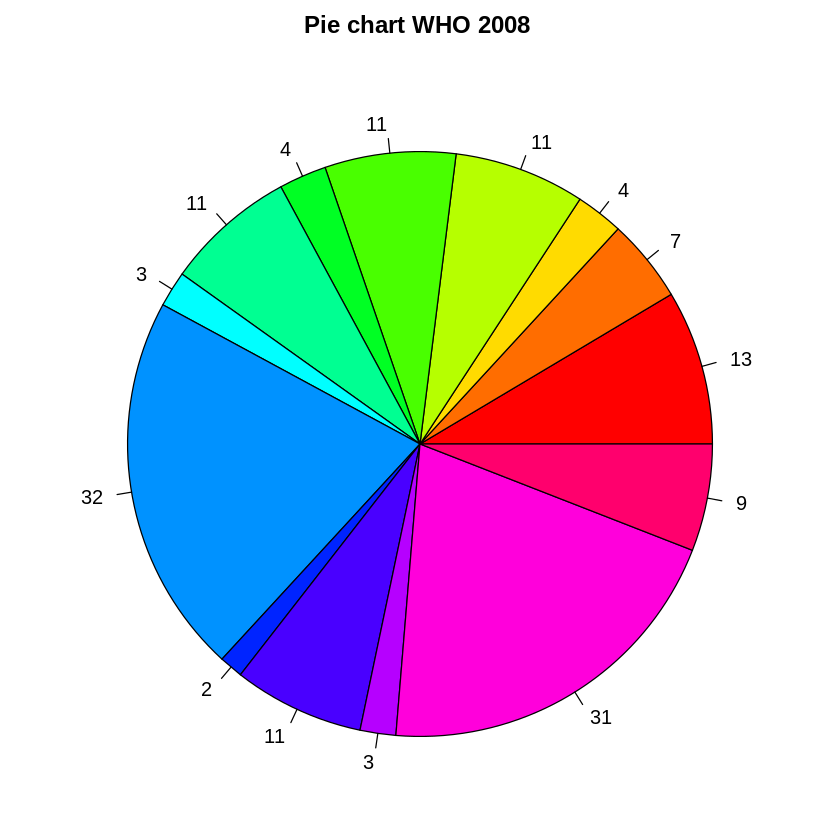

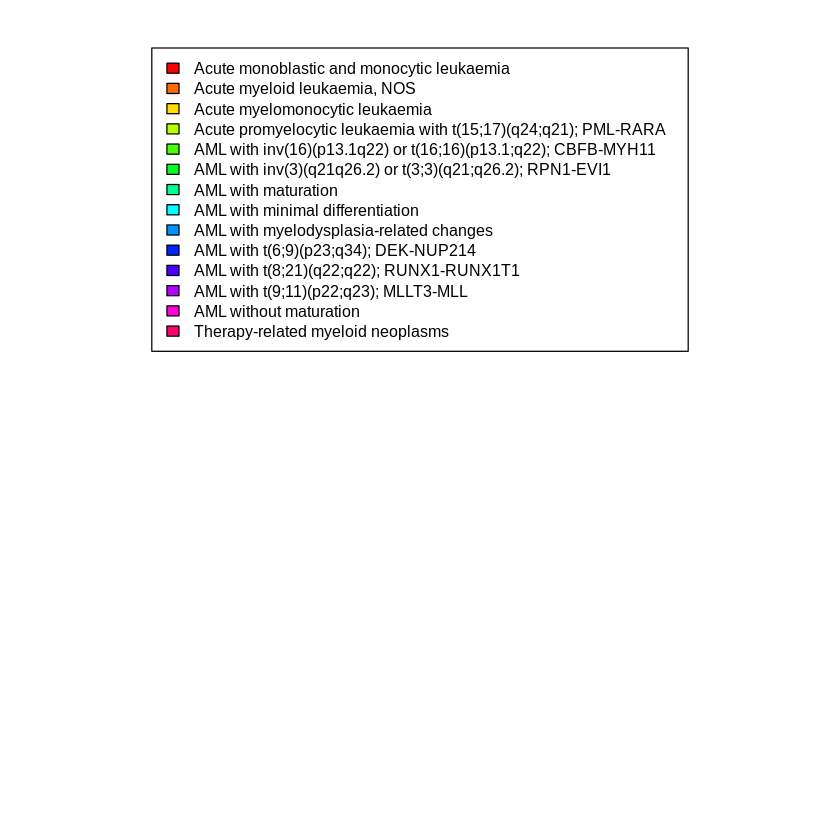

In [126]:
# count table
count_Who = count(data_AYA, "WHO_2008")

# Pie chart
par(xpd=TRUE, mar=c(0,0,2,0))
pie(count_Who$freq, main = "Pie chart WHO 2008 ",labels = count_Who$freq, col = rainbow(length(count_Who$freq)))
plot(1,type="n",axes=FALSE,xlab="",ylab="")
legend("top",legend = count_Who$WHO_2008, cex = 0.8,ncol = 1,
       fill = rainbow(length(count_Who$freq)),xpd=NA)


### FAB

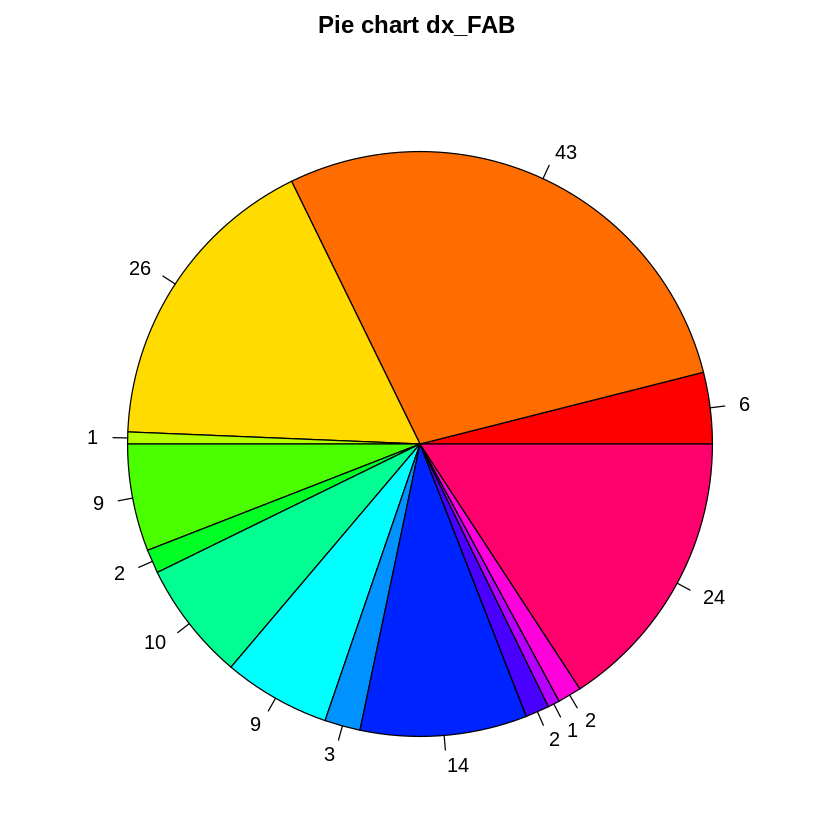

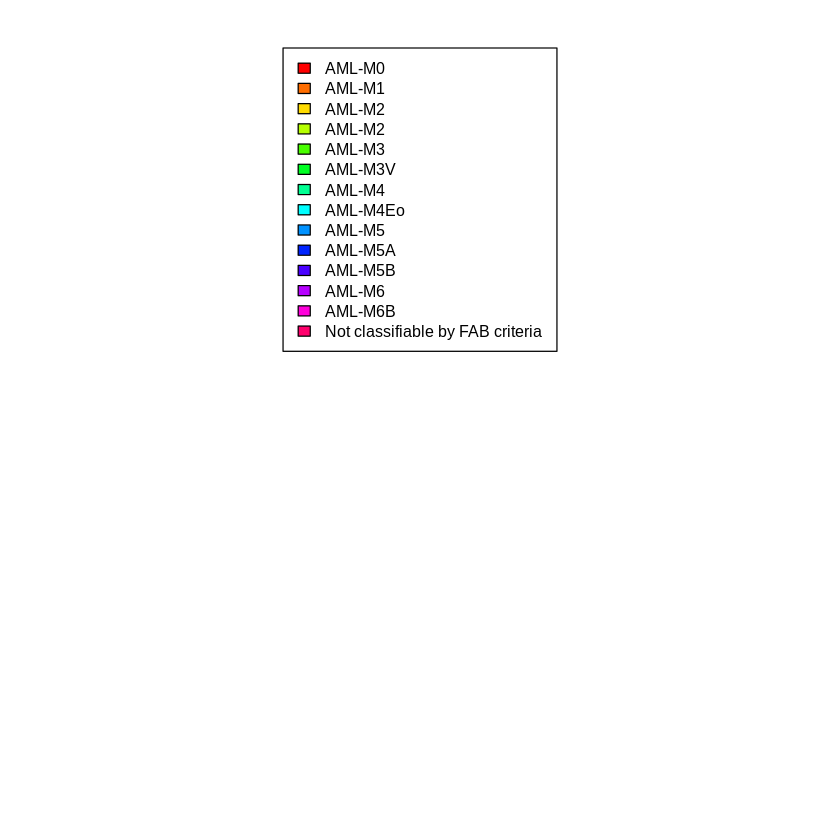

In [127]:
# count table
count_FAB = count(data_AYA, "dx_FAB")

# Pie chart
par(xpd=TRUE, mar=c(0,0,2,0))
pie(count_FAB$freq, main = "Pie chart dx_FAB ",labels = count_FAB$freq, col = rainbow(length(count_FAB$freq)))
plot(1,type="n",axes=FALSE,xlab="",ylab="")
legend("top",legend = count_FAB$dx_FAB, cex = 0.8,ncol = 1,
       fill = rainbow(length(count_FAB$freq)),xpd=NA)


## % Blast

[1] 121   9

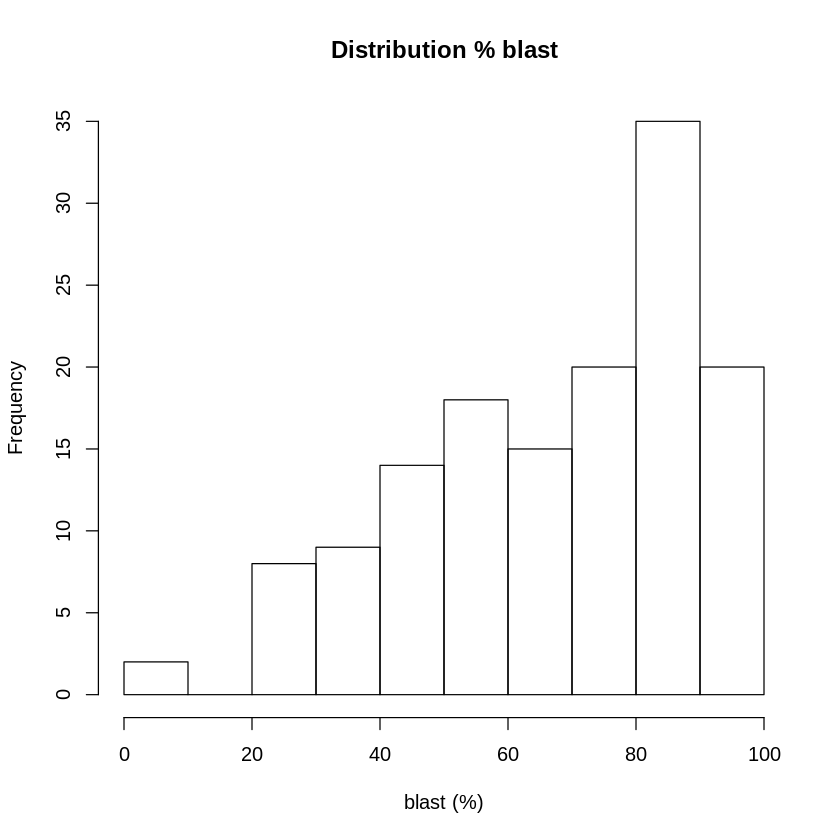

In [128]:
hist(as.numeric(unfactor(data_AYA$`blasts_(%)`)),xlab = "blast (%)", main = "Distribution % blast")

blast_sup_50 = data_AYA[which(unfactor(data_AYA$`blasts_(%)`)>=50),]
#blast_sup_50 # Individus sequence avec un pourcentage de blast > 50 %
dim(blast_sup_50) # Nombre d'individus sequence avec un pourcentage de blast > 50 %



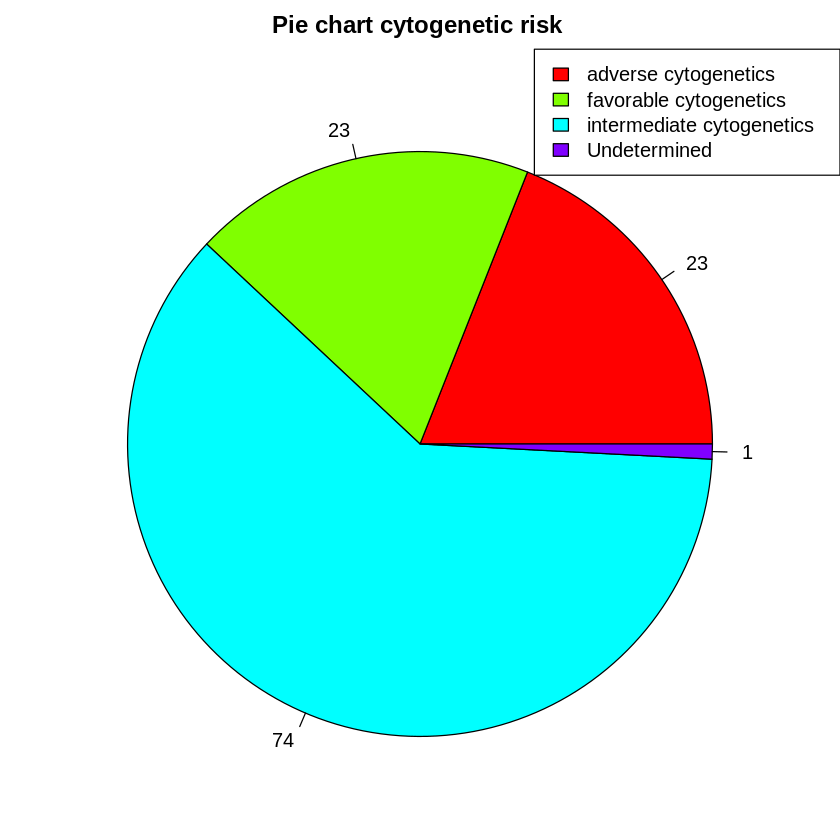

In [129]:

# count table
count_cytogenetic_risk = count(blast_sup_50,"cytogenetic_risk " )

# Pie chart
par(xpd=TRUE, mar=c(0,0,2,0))
pie(count_cytogenetic_risk$freq, main = "Pie chart cytogenetic risk ",labels = count_cytogenetic_risk$freq, col = rainbow(length(count_cytogenetic_risk$freq)))
legend("topright",legend = count_cytogenetic_risk$cytogenetic_risk, cex = 1,ncol = 1,
       fill = rainbow(length(count_cytogenetic_risk$freq)),xpd=NA)


In [130]:
adverse = row.names(blast_sup_50[which(unfactor(blast_sup_50$cytogenetic_risk)=="adverse cytogenetics"),])
blast_sup_50_adv = blast_sup_50[which(rownames(blast_sup_50) %in% adverse),]

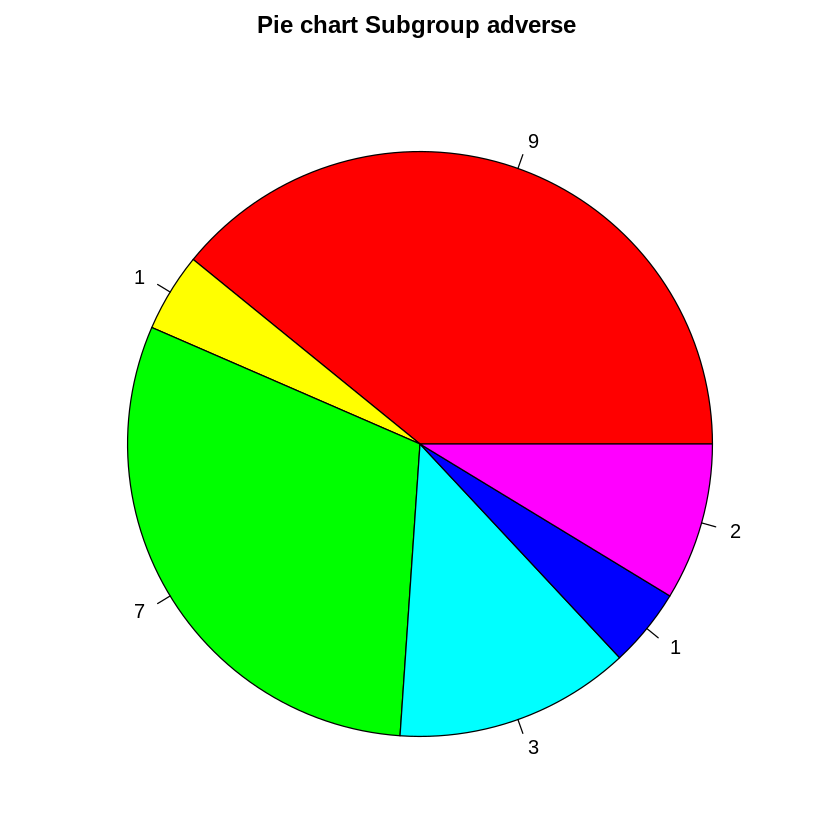

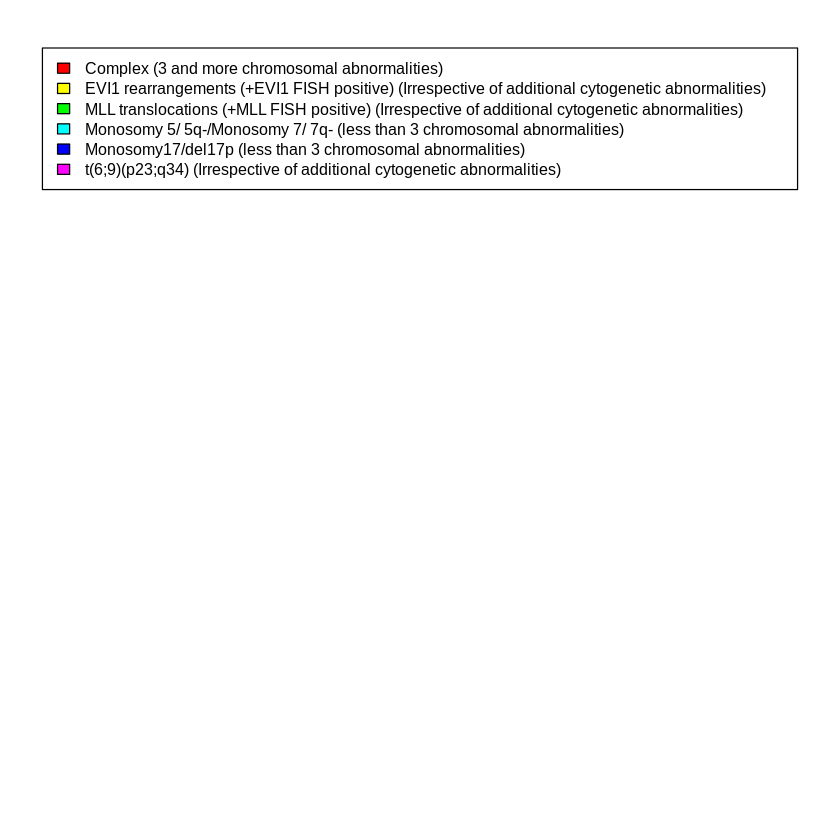

In [131]:

# count table
count_cytogenetic_risk = count(blast_sup_50_adv,"Subgroup" )

# Pie chart
par(xpd=TRUE, mar=c(0,0,2,0))
pie(count_cytogenetic_risk$freq, main = "Pie chart Subgroup adverse ",labels = count_cytogenetic_risk$freq, col = rainbow(length(count_cytogenetic_risk$freq)))
plot(1,type="n",axes=FALSE,xlab="",ylab="")
legend("top",legend = count_cytogenetic_risk$Subgroup, cex = 0.8,ncol = 1,
       fill = rainbow(length(count_cytogenetic_risk$freq)),xpd=NA)



## Analyse expression differentielle a partir des read count

In [132]:
adverse = row.names(data_AYA[which(unfactor(data_AYA$cytogenetic_risk)=="adverse cytogenetics"),])

intermediate = row.names(data_AYA[which(unfactor(data_AYA$cytogenetic_risk)=="intermediate cytogenetics"),])

favorable = row.names(data_AYA[which(unfactor(data_AYA$cytogenetic_risk)=="favorable cytogenetics"),])


In [133]:
read_count = read.table("/home/safia/Documents/AYA/genes_readcount.annotated.xls", header = T, sep="\t")

read_count<- data.frame(read_count[,-1], row.names=read_count[,1])
read_count = read_count[-c(1:4),]
read_count = read_count[,-c(582:585)]
names(read_count) = substring(names(read_count),8)


In [134]:
adverse = substring(adverse,2)
count_adverse = read_count[,adverse]
colnames(count_adverse) = paste("Adv", colnames(count_adverse), sep = "_")


intermediate = substring(intermediate,2)
count_intermediate = read_count[,intermediate]
colnames(count_intermediate) = paste("Int", colnames(count_intermediate), sep = "_")


favorable = substring(favorable,2)
count_favorable = read_count[,favorable]
colnames(count_favorable) = paste("Fav", colnames(count_favorable), sep = "_")


In [137]:
df = cbind(count_adverse,count_intermediate,count_favorable)
df_AI = cbind(count_adverse,count_intermediate)
df_AF = cbind(count_adverse,count_favorable)
df_IF = cbind(count_intermediate,count_favorable)

samples <- data.frame(groups = substr(colnames(df), 1, 3))
samples_AI <- data.frame(groups = substr(colnames(df_AI), 1, 3))
samples_AF <- data.frame(groups = substr(colnames(df_AF), 1, 3))
samples_IF <- data.frame(groups = substr(colnames(df_IF), 1, 3))

"base mean" (an average of the normalized mean counts per group), 
the log2 fold change between the groups, and the 
P-values (both "raw" and adjusted for multiple comparisons)

In [139]:
ds <- DESeqDataSetFromMatrix(countData=df, colData=samples, design=~groups)
colnames(ds) <- colnames(counts)
ds <-DESeq(ds)
res_AFI <- results(ds)
head(res_AFI)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 3507 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


log2 fold change (MLE): groups Int vs Adv 
Wald test p-value: groups Int vs Adv 
DataFrame with 6 rows and 6 columns
                            baseMean      log2FoldChange             lfcSE
                           <numeric>           <numeric>         <numeric>
ENSG00000223972.5   6.81342093751473  -0.900388654716398 0.292199065225381
ENSG00000227232.5   222.415111669361 -0.0567077141772716 0.110756339315725
ENSG00000278267.1   18.0262113969854   -0.18790861329855  0.15230746860783
ENSG00000243485.3   10.0281208234327   0.496715216472636 0.225895032496039
ENSG00000274890.1                  0                  NA                NA
ENSG00000237613.2 0.0895765729712037  0.0546736743986682  1.75950366683698
                                stat              pvalue               padj
                           <numeric>           <numeric>          <numeric>
ENSG00000223972.5  -3.08142209155222 0.00206014381062698 0.0158824848269235
ENSG00000227232.5 -0.512004229533257   0.60864804945429

In [140]:
library("tidyr")
library("dplyr")
library("ggplot2")


In [141]:
res <- results(ds, tidy=TRUE) %>%
  arrange(padj, pvalue) %>%
  tbl_df()
head(res)

goi <- res$row[1:9]
stopifnot(all(goi %in% names(ds)))
goi

tcounts <- t(log2((counts(ds[goi, ], normalized=TRUE, replaced=FALSE)+.5))) %>%
  merge(colData(ds), ., by="row.names") %>%
  gather(gene, expression, (ncol(.)-length(goi)+1):ncol(.))

head(tcounts)

#tcounts %>% 
#  select(Row.names, groups, gene, expression) %>% 
#  head %>% 
#  knitr::kable()




#ggplot(tcounts, aes(groups, expression, fill=groups)) + 
#  geom_boxplot() + 
#  facet_wrap(~gene, scales="free_y") + 
#  labs(x="Cytogenetic risk", 
#       y="Expression (log normalized counts)", 
#       fill="Cytogenetic risk", 
#       title="Top 9 Results")


row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000076706.14,740.40448,-4.872056,0.4270116,-11.409659,3.741948e-30,1.406186e-25
ENSG00000140459.17,15.64857,-5.074597,0.4600894,-11.029588,2.751216e-28,5.169398e-24
ENSG00000180532.10,21.29039,-6.147194,0.5836160,-10.532944,6.089973e-26,7.628503e-22
ENSG00000140986.7,38.89760,-2.943494,0.2916910,-10.091138,6.046437e-24,5.680476e-20
ENSG00000261150.2,60.71967,-4.060512,0.4095001,-9.915778,3.554753e-23,2.671681e-19
ENSG00000104140.6,42.68147,-3.966966,0.4096788,-9.683113,3.557172e-22,2.227916e-18


[1] "ENSG00000076706.14" "ENSG00000140459.17" "ENSG00000180532.10"
[4] "ENSG00000140986.7"  "ENSG00000261150.2"  "ENSG00000104140.6" 
[7] "ENSG00000187017.14" "ENSG00000187513.8"  "ENSG00000130201.7"

Row.names,groups,sizeFactor,replaceable,gene,expression
1,Adv,1.0351506,TRUE,ENSG00000076706.14,3.344890
10,Adv,1.0978496,TRUE,ENSG00000076706.14,6.600692
100,Int,0.7671423,TRUE,ENSG00000076706.14,3.449999
101,Int,0.7635215,TRUE,ENSG00000076706.14,3.456513
102,Int,0.3568785,TRUE,ENSG00000076706.14,7.191877
103,Int,0.9986346,TRUE,ENSG00000076706.14,5.944470


In [142]:
#if (!requireNamespace("BiocManager", quietly = TRUE))
 #   install.packages("BiocManager")
#BiocManager::install("biomaRt", version = "3.8")
library('biomaRt')

In [143]:
mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
genes <- tcounts$gene
genes <- gsub("\\..*","",genes )
G_list <- getBM(filters= "ensembl_gene_id", attributes= c("ensembl_gene_id",
"hgnc_symbol"),values=genes,mart= mart)
for (i in 1:length(genes)){
    if (genes[i] %in% G_list$ensembl_gene_id){
        tcounts$gene[i] = G_list[G_list$ensembl_gene_id == genes[i],]$hgnc_symbol
    }
}

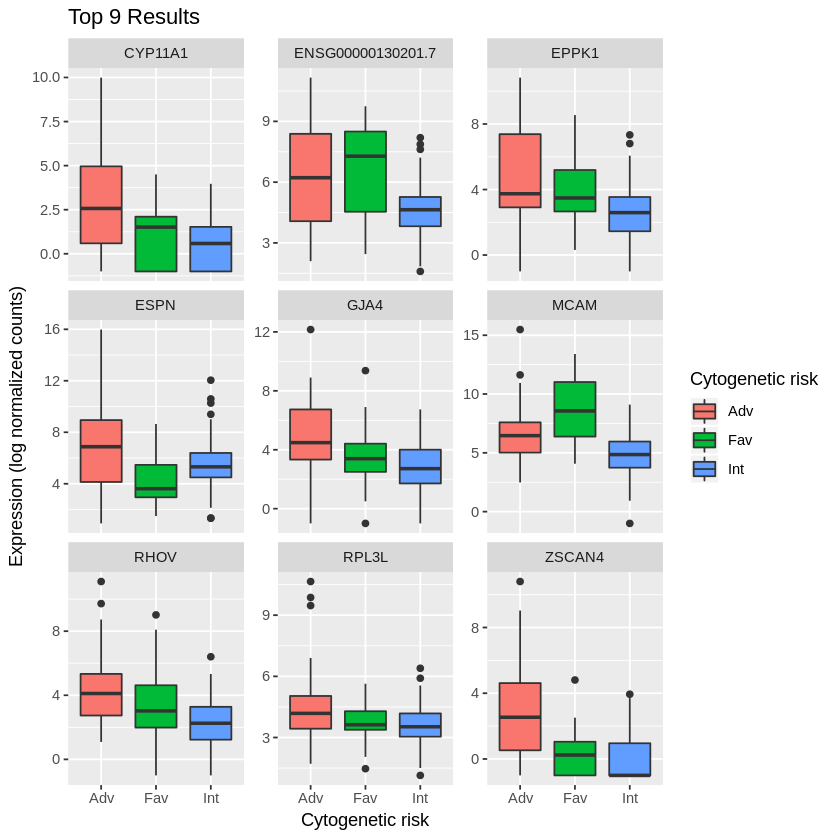

In [144]:
ggplot(tcounts, aes(groups, expression, fill=groups)) + 
  geom_boxplot() + 
  facet_wrap(~gene, scales="free_y") + 
  labs(x="Cytogenetic risk", 
       y="Expression (log normalized counts)", 
       fill="Cytogenetic risk", 
       title="Top 9 Results")


----

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 4236 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000140459.17,18.71741,-5.076434,0.4756450,-10.672737,1.365446e-26,5.104584e-22
ENSG00000104140.6,41.85778,-3.969161,0.3886249,-10.213345,1.728029e-24,3.230032e-20
ENSG00000261150.2,66.03076,-4.063376,0.4157089,-9.774570,1.447706e-22,1.804035e-18
ENSG00000187513.8,71.18319,-3.872530,0.4129465,-9.377801,6.736310e-21,5.357031e-17
ENSG00000130201.7,116.15454,-3.067183,0.3275012,-9.365409,7.575622e-21,5.357031e-17
ENSG00000141756.18,150.73249,-3.402520,0.3638267,-9.352034,8.597846e-21,5.357031e-17


Row.names,groups,sizeFactor,replaceable,gene,expression
1,Adv,1.0571421,TRUE,ENSG00000140459.17,-1.000000
10,Adv,1.1239483,TRUE,ENSG00000140459.17,6.745056
100,Int,0.7898805,TRUE,ENSG00000140459.17,0.820497
101,Int,0.7825816,TRUE,ENSG00000140459.17,-1.000000
102,Int,0.3642953,TRUE,ENSG00000140459.17,2.582568
103,Int,1.0217101,TRUE,ENSG00000140459.17,1.297193


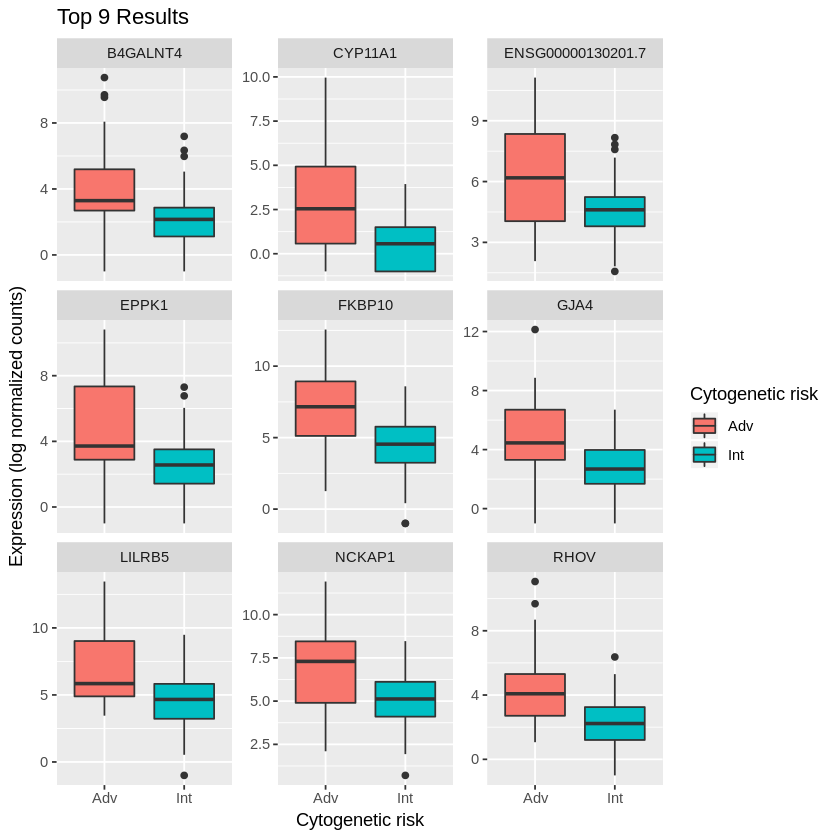

In [145]:
ds_AI <- DESeqDataSetFromMatrix(countData=df_AI, colData=samples_AI, design=~groups)
colnames(ds_AI) <- colnames(counts)
ds_AI <-DESeq(ds_AI)
res_AI <- results(ds_AI)


res <- results(ds_AI, tidy=TRUE) %>%
  arrange(padj, pvalue) %>%
  tbl_df()
head(res)

goi <- res$row[1:9]
stopifnot(all(goi %in% names(ds_AI)))


tcounts <- t(log2((counts(ds_AI[goi, ], normalized=TRUE, replaced=FALSE)+.5))) %>%
  merge(colData(ds_AI), ., by="row.names") %>%
  gather(gene, expression, (ncol(.)-length(goi)+1):ncol(.))

head(tcounts)


mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
genes <- tcounts$gene
genes <- gsub("\\..*","",genes )
G_list <- getBM(filters= "ensembl_gene_id", attributes= c("ensembl_gene_id",
"hgnc_symbol"),values=genes,mart= mart)
for (i in 1:length(genes)){
    if (genes[i] %in% G_list$ensembl_gene_id){
        tcounts$gene[i] = G_list[G_list$ensembl_gene_id == genes[i],]$hgnc_symbol
    }
}

ggplot(tcounts, aes(groups, expression, fill=groups)) + 
  geom_boxplot() + 
  facet_wrap(~gene, scales="free_y") + 
  labs(x="Cytogenetic risk", 
       y="Expression (log normalized counts)", 
       fill="Cytogenetic risk", 
       title="Top 9 Results")



----

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 3765 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


log2 fold change (MLE): groups Fav vs Adv 
Wald test p-value: groups Fav vs Adv 
DataFrame with 6 rows and 6 columns
                           baseMean     log2FoldChange             lfcSE
                          <numeric>          <numeric>         <numeric>
ENSG00000223972.5  9.78094819238956  0.145290776896913 0.406698119511516
ENSG00000227232.5  230.290136212092 -0.128597291013012 0.147938357025871
ENSG00000278267.1  22.1680832864559  0.543995527900806 0.191191787354175
ENSG00000243485.3    10.10069480894  0.730570362239652 0.293433138149101
ENSG00000274890.1                 0                 NA                NA
ENSG00000237613.2 0.130265302479445 0.0695717343119896  1.86910911389735
                                stat              pvalue               padj
                           <numeric>           <numeric>          <numeric>
ENSG00000223972.5  0.357244771801308   0.720908571226536  0.842550267412853
ENSG00000227232.5 -0.869262668575693   0.384703476849036  0.58246200946

row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000168497.4,1575.7250,-6.207688,0.3484677,-17.81424,5.479476e-71,2.060119e-66
ENSG00000139117.13,1559.3771,-5.429718,0.3713834,-14.62025,2.086308e-48,3.921946e-44
ENSG00000229425.2,943.7146,-7.923437,0.5548102,-14.28135,2.860226e-46,3.584531e-42
ENSG00000265190.6,498.8495,5.693417,0.4156409,13.69792,1.044675e-42,9.819161e-39
ENSG00000106006.6,250.4356,-8.073627,0.5965826,-13.53313,9.969299e-42,7.496315e-38
ENSG00000188580.13,110.4437,-6.262484,0.4733336,-13.23059,5.842408e-40,3.660950e-36


Row.names,groups,sizeFactor,replaceable,gene,expression
1,Adv,0.9972751,TRUE,ENSG00000168497.4,6.916810
10,Adv,1.0477203,TRUE,ENSG00000168497.4,9.880418
11,Adv,1.0995680,TRUE,ENSG00000168497.4,13.034482
12,Adv,1.0003808,TRUE,ENSG00000168497.4,8.402464
13,Adv,1.0619069,TRUE,ENSG00000168497.4,10.340164
14,Adv,1.0057511,TRUE,ENSG00000168497.4,9.691304


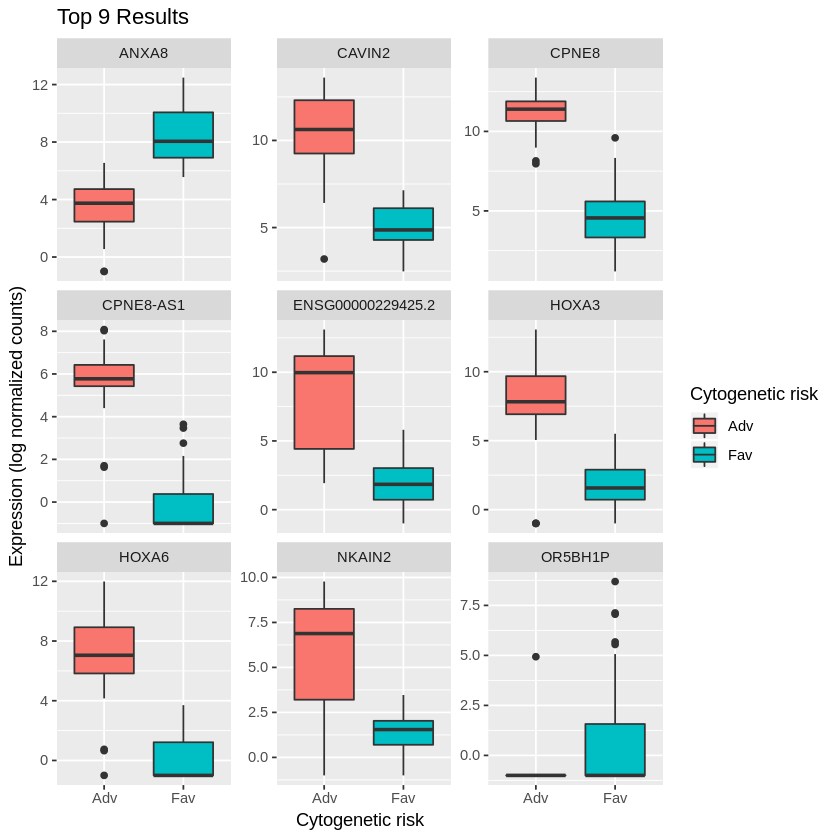

In [146]:
ds_AF<- DESeqDataSetFromMatrix(countData=df_AF, colData=samples_AF, design=~groups)
colnames(ds_AF) <- colnames(counts)
ds_AF <-DESeq(ds_AF)
res_AF <- results(ds_AF)
head(res_AF)

res <- results(ds_AF, tidy=TRUE) %>%
  arrange(padj, pvalue) %>%
  tbl_df()
head(res)

goi <- res$row[1:9]
stopifnot(all(goi %in% names(ds_AF)))


tcounts <- t(log2((counts(ds_AF[goi, ], normalized=TRUE, replaced=FALSE)+.5))) %>%
  merge(colData(ds_AF), ., by="row.names") %>%
  gather(gene, expression, (ncol(.)-length(goi)+1):ncol(.))

head(tcounts)


mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
genes <- tcounts$gene
genes <- gsub("\\..*","",genes )
G_list <- getBM(filters= "ensembl_gene_id", attributes= c("ensembl_gene_id",
"hgnc_symbol"),values=genes,mart= mart)

for (i in 1:length(genes)){
    if (genes[i] %in% G_list$ensembl_gene_id){
        a = G_list[G_list$ensembl_gene_id == genes[i],]$hgnc_symbol[1]
        if (a != ""){
            tcounts$gene[i] = a
        }
    }
}

ggplot(tcounts, aes(groups, expression, fill=groups)) + 
  geom_boxplot() + 
  facet_wrap(~gene, scales="free_y") + 
  labs(x="Cytogenetic risk", 
       y="Expression (log normalized counts)", 
       fill="Cytogenetic risk", 
       title="Top 9 Results")


----

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 2831 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000277867.1,40.98106,24.923725,1.0658329,23.38427,6.178273e-121,2.374867e-116
ENSG00000106006.6,771.98901,9.243961,0.4269986,21.64869,6.252986e-104,1.201793e-99
ENSG00000105997.22,1051.20102,7.742617,0.3603073,21.48892,1.976396e-102,2.532357e-98
ENSG00000254369.6,605.89029,8.984685,0.4382025,20.50350,2.003583e-93,1.925393e-89
ENSG00000253552.7,429.02586,6.343401,0.3365287,18.84951,2.965910e-79,2.280132e-75
ENSG00000106004.4,3402.40741,7.197681,0.3897439,18.46772,3.756075e-76,2.406329e-72


Row.names,groups,sizeFactor,replaceable,gene,expression
1,Int,0.9349737,TRUE,ENSG00000277867.1,0.6503499
10,Int,0.9849938,TRUE,ENSG00000277867.1,-1.0000000
100,Fav,1.2766175,TRUE,ENSG00000277867.1,-1.0000000
101,Fav,1.6994194,TRUE,ENSG00000277867.1,-1.0000000
102,Fav,1.3082725,TRUE,ENSG00000277867.1,-1.0000000
103,Fav,1.3181788,TRUE,ENSG00000277867.1,-1.0000000


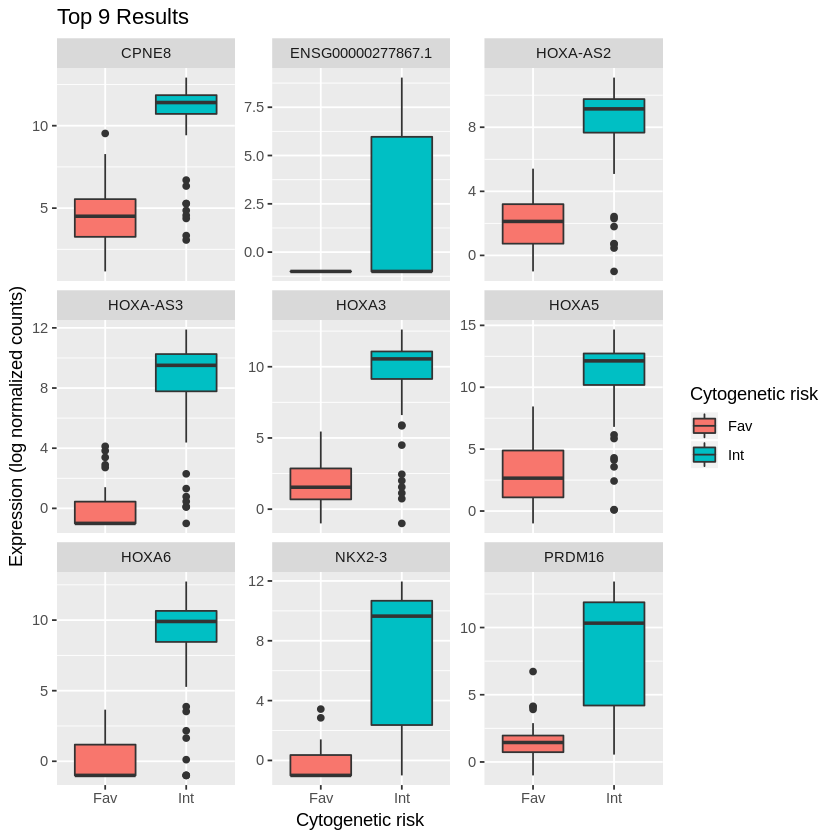

In [147]:
ds_IF <- DESeqDataSetFromMatrix(countData=df_IF, colData=samples_IF, design=~groups)
colnames(ds_IF) <- colnames(counts)
ds_IF <-DESeq(ds_IF)
res_IF <- results(ds_IF)


res <- results(ds_IF, tidy=TRUE) %>%
  arrange(padj, pvalue) %>%
  tbl_df()
head(res)

goi <- res$row[1:9]
stopifnot(all(goi %in% names(ds_IF)))


tcounts <- t(log2((counts(ds_IF[goi, ], normalized=TRUE, replaced=FALSE)+.5))) %>%
  merge(colData(ds_IF), ., by="row.names") %>%
  gather(gene, expression, (ncol(.)-length(goi)+1):ncol(.))

head(tcounts)


mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
genes <- tcounts$gene
genes <- gsub("\\..*","",genes )
G_list <- getBM(filters= "ensembl_gene_id", attributes= c("ensembl_gene_id",
"hgnc_symbol"),values=genes,mart= mart)
for (i in 1:length(genes)){
    if (genes[i] %in% G_list$ensembl_gene_id){
        a = G_list[G_list$ensembl_gene_id == genes[i],]$hgnc_symbol
        if (a != ""){
            tcounts$gene[i] = a
        }
         
    }
}

ggplot(tcounts, aes(groups, expression, fill=groups)) + 
  geom_boxplot() + 
  facet_wrap(~gene, scales="free_y") + 
  labs(x="Cytogenetic risk", 
       y="Expression (log normalized counts)", 
       fill="Cytogenetic risk", 
       title="Top 9 Results")


----

In [148]:
write.table(res_AFI, "res_DE_AFI_selected_noblast.xls", sep="\t") 
write.table(res_AI, "res_DE_AI_selected_noblast.xls", sep="\t") 
write.table(res_AF, "res_DE_AF_selected_noblast.xls", sep="\t") 
write.table(res_IF, "res_DE_FI_selected_noblast.xls", sep="\t") 


#### Diagramm Venn

In [149]:
#res_AI = read.table("res_DE_AI_selected.xls", sep="\t")

#res_AF = read.table("res_DE_AF_selected.xls", sep="\t")

#res_FI = read.table("res_DE_FI_selected.xls", sep="\t")

#res_AFI = read.table("res_DE_AFI_selected.xls", sep="\t")

In [150]:
THRESHOLD <- 0.05
res_AI.sig <- subset(res_AI, padj<THRESHOLD) 
res_AF.sig <- subset(res_AF, padj<THRESHOLD)  
res_FI.sig <- subset(res_IF, padj<THRESHOLD) 
res_AFI.sig <- subset(res_AFI, padj<THRESHOLD)



In [151]:
length(rownames(res_AI.sig))
length(rownames(res_AF.sig))
length(rownames(res_FI.sig))
length(rownames(res_AFI.sig))

[1] 6943

[1] 8158

[1] 12648

[1] 7387

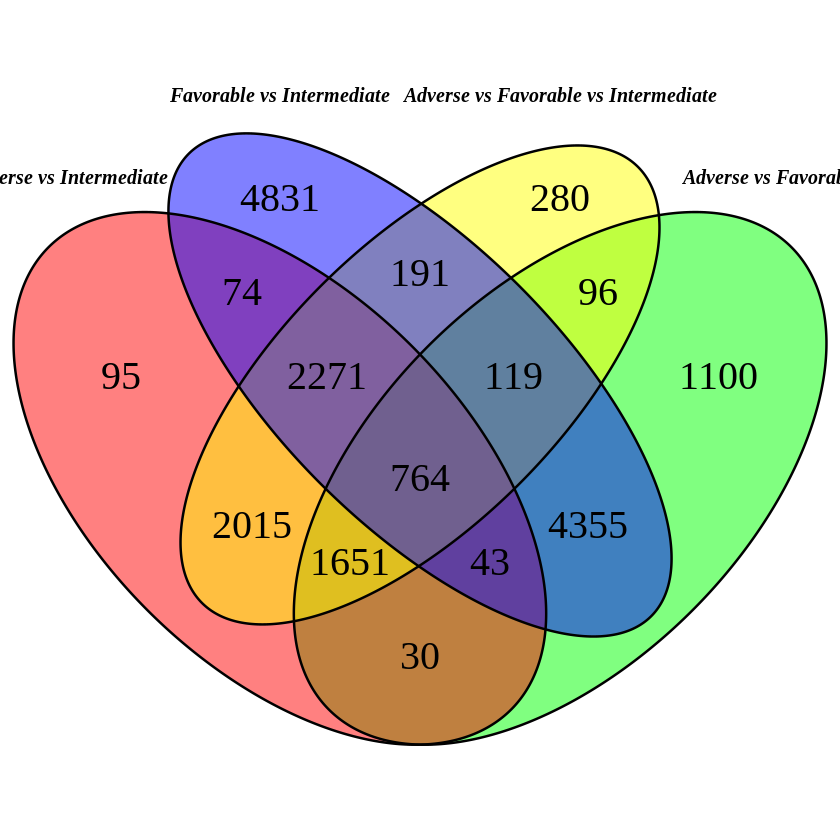

In [152]:
library(VennDiagram)

venn.plot <- venn.diagram(list(rownames(res_AI.sig), rownames(res_AF.sig), rownames(res_FI.sig), rownames(res_AFI.sig)), NULL, fill=c("red", "green","blue","yellow"), alpha=c(0.5,0.5,0.5,0.5), cex = 2, cat.fontface=4, category.names=c("Adverse vs Intermediate", "Adverse vs Favorable","Favorable vs Intermediate","Adverse vs Favorable vs Intermediate"))
grid.draw(venn.plot)


### SOUS GROUPE ADVERSE

In [184]:
adverse = row.names(data_AYA[which(unfactor(data_AYA$cytogenetic_risk)=="adverse cytogenetics"),])

In [185]:
API_Adv = data_AYA[which(rownames(data_AYA) %in% adverse),]
count_Adv_subgroup = count(API_Adv, "cytogenetic_subgroup")

In [186]:
count_Adv_subgroup

cytogenetic_subgroup,freq
Complex (3 and more chromosomal abnormalities),16
EVI1 rearrangements (+EVI1 FISH positive) (Irrespective of additional cytogenetic abnormalities),5
MLL translocations (+MLL FISH positive) (Irrespective of additional cytogenetic abnormalities),7
Monosomy 5/ 5q-/Monosomy 7/ 7q- (less than 3 chromosomal abnormalities),3
Monosomy17/del17p (less than 3 chromosomal abnormalities),1
t(6;9)(p23;q34) (Irrespective of additional cytogenetic abnormalities),2


In [187]:
complex = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[1]),])

mll = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[3]),])

m5_m7 = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[4]),])

m17 = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[5]),])

t6_9 = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[6]),])

### Classification groupe complexe

In [188]:
read_count = read.table("/home/safia/Documents/AYA/genes_readcount.annotated.xls", header = T, sep="\t")

read_count<- data.frame(read_count[,-1], row.names=read_count[,1])
read_count = read_count[-c(1:4),]
read_count = read_count[,-c(582:585)]
names(read_count) = substring(names(read_count),8)


In [189]:
complex = substring(complex,2)
count_complex = read_count[,complex]


In [190]:
cohort_IQR = apply(count_complex,1,IQR)

In [191]:
rank_cohort_IQR = rank(cohort_IQR)

In [192]:
ordered_data=count_complex[order(-rank_cohort_IQR),]

In [193]:
tordered_data=t(ordered_data)


In [194]:
sample_dist=dist(tordered_data[,c(1:500)], method = "euclidean")

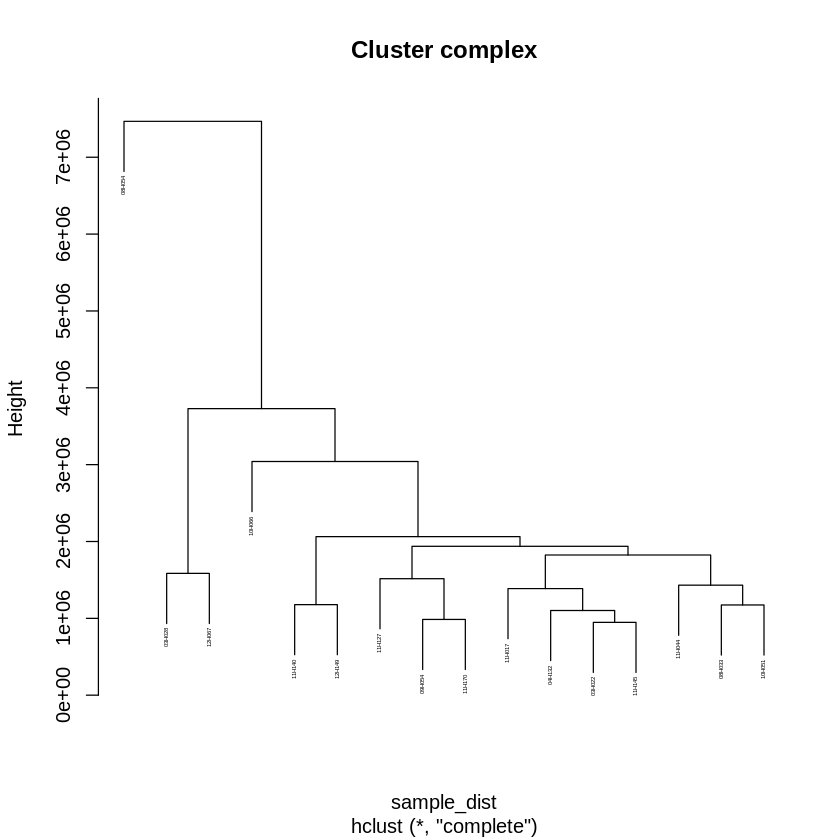

In [195]:
hc=hclust(sample_dist, method = "complete", members = NULL)

plot(hc, cex=0.3, main = "Cluster complex")

#### information mutation p53

In [196]:
library(dendextend)

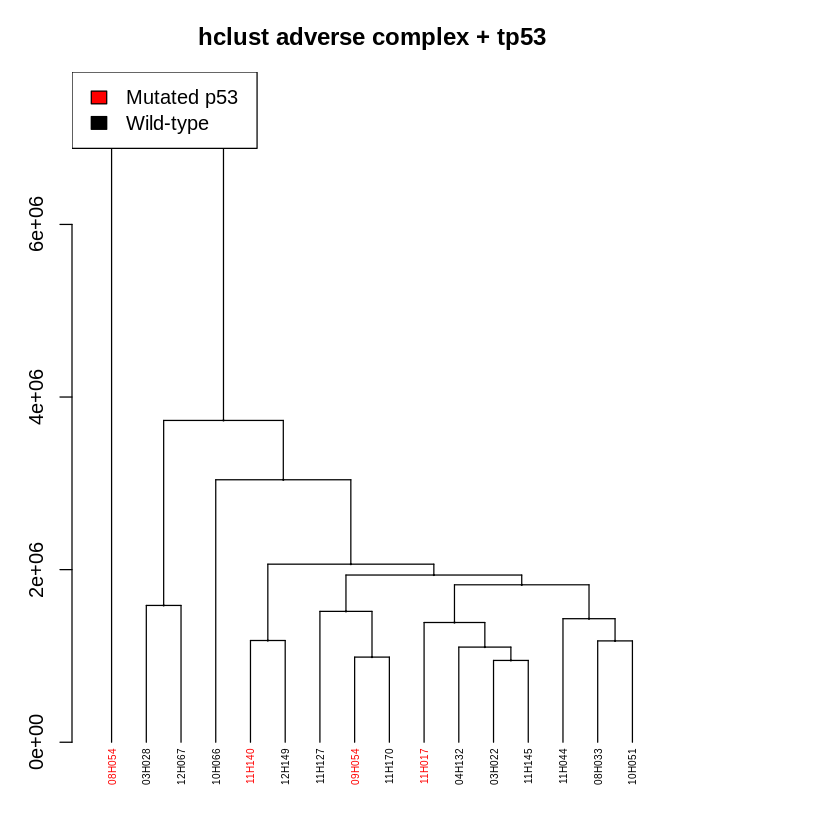

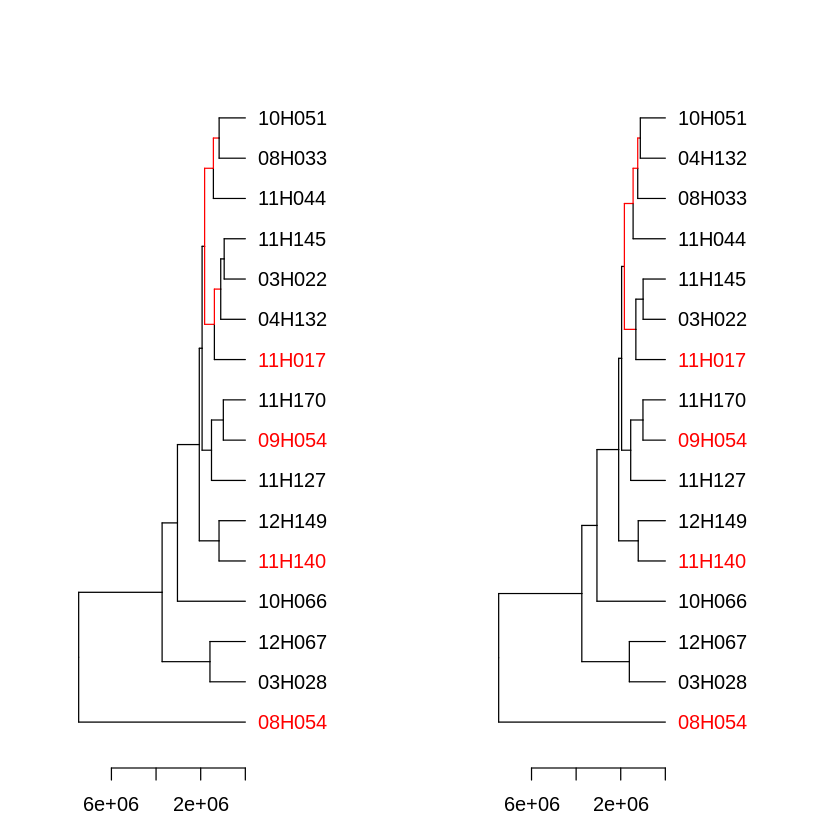

In [197]:
tp53_mutations = read.table("/home/safia/Documents/AYA/tp53_mutations.txt", header = T, sep="\t")
tp53 = colnames(tp53_mutations[2:171])
tp53 = substring(tp53,2)
cohort_IQR = apply(count_complex,1,IQR)
rank_cohort_IQR = rank(cohort_IQR)
ordered_data=count_complex[order(-rank_cohort_IQR),]
tordered_data=t(ordered_data)

sample_dist_500=dist(tordered_data[,c(1:500)], method = "euclidean")
hc_500=hclust(sample_dist_500, method = "complete", members = NULL)
dend <- as.dendrogram(hc_500)
dend2 <- color_labels(dend, col = ifelse(labels(hc_500) %in% tp53, 2, 1)) 

par(mar = c(3,3,3,7))
dend2 %>%   set("labels_cex", 0.5) %>% # Change size
  plot(main = "hclust adverse complex + tp53", 
       nodePar = list(cex = .007)) # plot
legend("topleft", legend = c("Mutated p53","Wild-type"), fill = c("red","black"))

sample_dist_1000=dist(tordered_data[,c(1:1000)], method = "euclidean")
hc_1000=hclust(sample_dist_1000, method = "complete", members = NULL)
dend1 <- as.dendrogram(hc_1000)
dend3 <- color_labels(dend1, col = ifelse(labels(hc_1000) %in% tp53, 2, 1)) 
dend_diff(dend2, dend3)

#### complex + 5 MLL

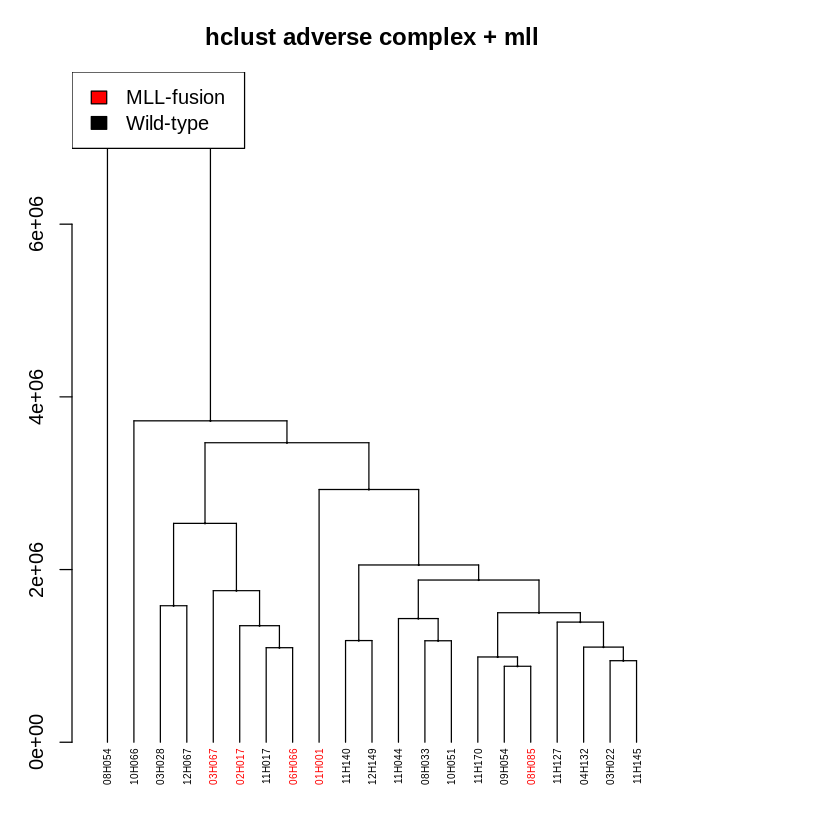

In [198]:
mll = substring(mll,2)
count_mll = read_count[,mll[1:5]]
mll_complex = cbind(count_complex,count_mll)
cohort_IQR = apply(mll_complex,1,IQR)
rank_cohort_IQR = rank(cohort_IQR)

ordered_data=mll_complex[order(-rank_cohort_IQR),]
tordered_data=t(ordered_data)
sample_dist_500=dist(tordered_data[,c(1:500)], method = "euclidean")
hc_500=hclust(sample_dist_500, method = "complete", members = NULL)
dend <- as.dendrogram(hc_500)


dend2 <- color_labels(dend, col = ifelse(labels(hc_500) %in% mll, 2, 1)) 

par(mar = c(3,3,3,7))
dend2 %>%   set("labels_cex", 0.5) %>% # Change size
  plot(main = "hclust adverse complex + mll", 
       nodePar = list(cex = .007)) # plot
legend("topleft", legend = c("MLL-fusion","Wild-type"), fill = c("red","black"))

#### Complex + 5 MLL + tp53

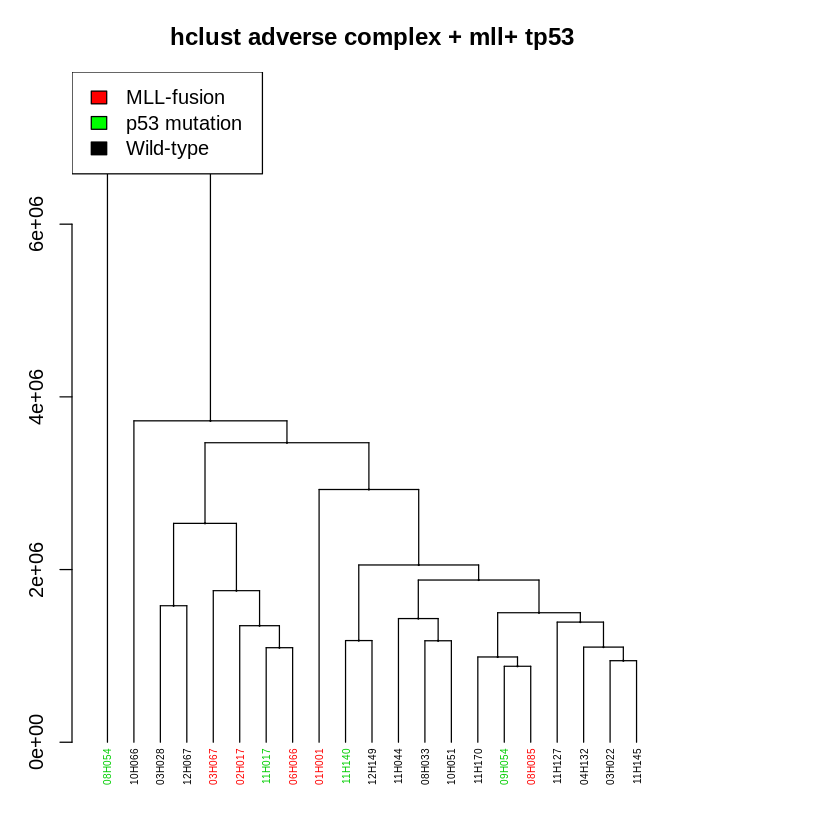

In [199]:
dend2 <- color_labels(dend, col = ifelse(labels(hc_500) %in% mll , 2 , ifelse(labels(hc_500) %in% tp53, 3, 1))) 

par(mar = c(3,3,3,7))
dend2 %>%   set("labels_cex", 0.5) %>% # Change size
  plot(main = "hclust adverse complex + mll+ tp53", 
       nodePar = list(cex = .007)) # plot
legend("topleft", legend = c("MLL-fusion","p53 mutation","Wild-type"), fill = c("red","green","black"))

#### Other mutation

In [ ]:
df = read.csv("/home/safia/Documents/AYA/RE__info/API_getTable_db7114.xls",header = T,sep = "\t")
df = df[,-c(1,511:514,516:523)]
library(dplyr)
df_2 <- df %>% dplyr::na_if("-")

test <- data.frame(patient=character(),
                 genes=character(),
                 stringsAsFactors=FALSE)

flag=0
for (n in 1:509){
  for (j in 1:length(levels(df_2[which(df_2[n]!="<NA>"),510]))){
    test[flag+j,2] = as.character(df_2[which(df_2[n]!="<NA>"),510][j])
    test[flag+j,1] = colnames(df_2[n])
  }
  flag=flag+j
  }

test = test[!duplicated(test), ]
test = na.omit(test)
library(plyr)
table_genes = count(test, "genes")

write.table(table_genes[order(table_genes$freq, decreasing = T),], "/home/safia/Documents/AYA/RE__info/db7114/table_mutations_freq.csv", col.names= T, row.names= F, quote= F,sep ="\t")


test_2 = test[-c(which(test$genes %in% table_genes[which(table_genes$freq == 1),]$genes)),]


X<-split(test_2, test_2$genes)

filenames <- names(X)


for (i in 1:length(X)){
  outname <- paste("/home/safia/Documents/AYA/RE__info/db7114/", filenames[i], ".csv", sep= "")
  write.table(X[[i]], outname, col.names= F, row.names= F, quote= F,sep ="\t")
}


##############
df = read.csv("/home/safia/Documents/AYA/RE__info/API_getTable_185701.xls",header = T,sep = "\t")
df = df[,-c(1,511:514,516:523)]

df_2 <- df %>% dplyr::na_if("-")

test <- data.frame(patient=character(),
                   genes=character(),
                   stringsAsFactors=FALSE)

flag=0
for (n in 1:509){
  for (j in 1:length(levels(df_2[which(df_2[n]!="<NA>"),510]))){
    test[flag+j,2] = as.character(df_2[which(df_2[n]!="<NA>"),510][j])
    test[flag+j,1] = colnames(df_2[n])
  }
  flag=flag+j
}

test = test[!duplicated(test), ]
test = na.omit(test)

table_genes = count(test, "genes")



write.table(table_genes[order(table_genes$freq, decreasing = T),], "/home/safia/Documents/AYA/RE__info/1857701/table_mutations_freq.csv", col.names= T, row.names= F, quote= F,sep ="\t")

test_2 = test[-c(which(test$genes %in% table_genes[which(table_genes$freq == 1),]$genes)),]


X<-split(test_2, test_2$genes)

filenames <- names(X)


for (i in 1:length(X)){
  outname <- paste("/home/safia/Documents/AYA/RE__info/1857701/", filenames[i], ".csv", sep= "")
  write.table(X[[i]], outname, col.names= F, row.names= F, quote= F,sep ="\t")
}


In [201]:
files = list.files(path = "/home/safia/Documents/AYA/RE__info/1857701/", pattern = "*.csv")
pdf("/home/safia/Documents/hclust_mutation.pdf")
for (ele in files){
    nbpf1_mutations = read.table(paste("/home/safia/Documents/AYA/RE__info/1857701/",ele,sep = ""), header = F,sep="\t")
    nbpf1 = nbpf1_mutations$V1
    nbpf1 = substring(nbpf1,2)
    cohort_IQR = apply(mll_complex,1,IQR)
    rank_cohort_IQR = rank(cohort_IQR)

    ordered_data=count_complex[order(-rank_cohort_IQR),]
    tordered_data=t(ordered_data)
    setdiff(labels(hc_500), nbpf1)
    sample_dist_500=dist(tordered_data[,c(1:500)], method = "euclidean")
    hc_500=hclust(sample_dist_500, method = "complete", members = NULL)
    dend <- as.dendrogram(hc_500)

    dend2 <- color_labels(dend, col = ifelse(labels(hc_500) %in% nbpf1, 2, ifelse(labels(hc_500) %in% mll, 3, 1))) 
    par(mar = c(3,3,3,7))
    dend2 %>%   set("labels_cex", 0.5) %>% 
      plot(main = paste("hclust adverse complex +",substring(ele,1,nchar(ele)-4)), 
           nodePar = list(cex = .007)) 
    legend("topright", legend = c("MLL-fusion",paste("Mutated ",substring(ele,1,nchar(ele)-4)),"Wild-type"), fill = c("red","green","black"))
    }
dev.off()

png 
  2

#### clustering PAM

In [82]:
library(cluster)
library(dplyr)
library(ggplot2)
library(readr)
library(Rtsne)
library(ISLR) # for college dataset

In [90]:

gower_dist <- daisy(tordered_data[,c(1:500)],
                    metric = "gower",
                    type = list(logratio = 3))


#summary(gower_dist)



gower_mat <- as.matrix(gower_dist)



In [94]:
#Patients les plus proches
tordered_data[
  which(gower_mat == min(gower_mat[gower_mat != min(gower_mat)]),
        arr.ind = TRUE)[1, ], ]

#Patients les plus éloigné
tordered_data[
  which(gower_mat == max(gower_mat[gower_mat != max(gower_mat)]),
        arr.ind = TRUE)[1, ], ]


ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

,ENSG00000244734.3,ENSG00000198804.2,ENSG00000156508.17,ENSG00000198938.2,ENSG00000198886.2,ENSG00000005381.7,ENSG00000210082.2,ENSG00000198888.2,ENSG00000090382.6,ENSG00000198712.1,⋯,ENSG00000210135.1,ENSG00000210151.2,ENSG00000210154.1,ENSG00000210156.1,ENSG00000210164.1,ENSG00000210174.1,ENSG00000210176.1,ENSG00000210184.1,ENSG00000210191.1,ENSG00000210195.2
11H170,104491,385429,968455,202870,209480,4651,118062,48830,21661,210362,⋯,0,0,0,0,0,0,0,0,0,0
09H054,207482,336206,219873,196941,210101,28352,154381,71664,14332,196645,⋯,0,0,0,0,0,0,0,0,0,0


ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

,ENSG00000244734.3,ENSG00000198804.2,ENSG00000156508.17,ENSG00000198938.2,ENSG00000198886.2,ENSG00000005381.7,ENSG00000210082.2,ENSG00000198888.2,ENSG00000090382.6,ENSG00000198712.1,⋯,ENSG00000210135.1,ENSG00000210151.2,ENSG00000210154.1,ENSG00000210156.1,ENSG00000210164.1,ENSG00000210174.1,ENSG00000210176.1,ENSG00000210184.1,ENSG00000210191.1,ENSG00000210195.2
11H140,1179026,631364,1103614,343939,404179,318238,428366,187531,246218,278326,⋯,0,0,0,0,0,0,0,0,0,0
03H028,216674,2439452,626153,1115495,981391,34508,1368274,1048113,14784,1361566,⋯,0,0,0,0,0,0,1,0,0,2


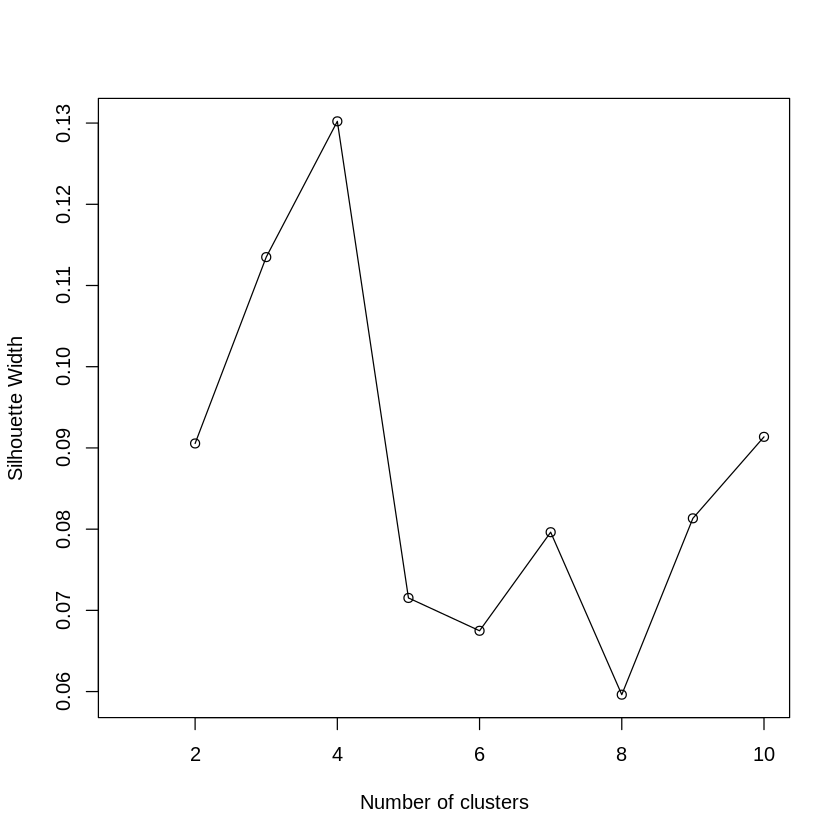

In [95]:
# Calculate silhouette width for many k using PAM

sil_width <- c(NA)

for(i in 2:10){
  
  pam_fit <- pam(gower_dist,
                 diss = TRUE,
                 k = i)
  
  sil_width[i] <- pam_fit$silinfo$avg.width
  
}

# Plot sihouette width (higher is better)

plot(1:10, sil_width,
     xlab = "Number of clusters",
     ylab = "Silhouette Width")
lines(1:10, sil_width)


In [100]:
pam_fit <- pam(gower_dist, diss = TRUE, k = which(sil_width == max(sil_width, na.rm = T)))

In [101]:
tordered_data[pam_fit$medoids, ]

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

,ENSG00000244734.3,ENSG00000198804.2,ENSG00000156508.17,ENSG00000198938.2,ENSG00000198886.2,ENSG00000005381.7,ENSG00000210082.2,ENSG00000198888.2,ENSG00000090382.6,ENSG00000198712.1,⋯,ENSG00000210135.1,ENSG00000210151.2,ENSG00000210154.1,ENSG00000210156.1,ENSG00000210164.1,ENSG00000210174.1,ENSG00000210176.1,ENSG00000210184.1,ENSG00000210191.1,ENSG00000210195.2
10H051,1184975,804497,558336,471910,592946,362169,560310,355231,399692,429857,⋯,0,0,0,0,0,0,0,0,0,0
12H067,402902,1287607,770969,1222527,879517,1060,1323745,447823,855,1317004,⋯,0,0,0,0,0,0,1,1,0,2
11H170,104491,385429,968455,202870,209480,4651,118062,48830,21661,210362,⋯,0,0,0,0,0,0,0,0,0,0
11H145,103793,618881,655168,533912,467816,11048,394623,312110,156966,365889,⋯,0,0,0,0,0,0,0,0,0,0


  cluster size ave.sil.width
1       1    7          0.13
2       2    2          0.28
3       3    3          0.24
4       4    4         -0.02


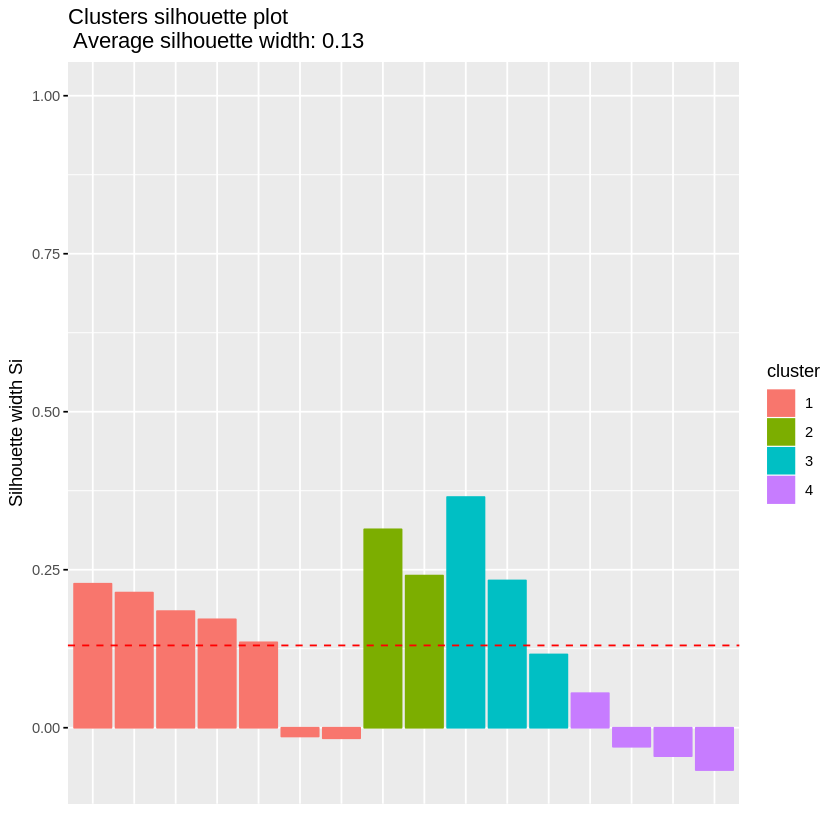

In [117]:
library(factoextra)
fviz_silhouette(silhouette(pam_fit)) 

It can be seen that some samples have a negative silhouette. This means that they are not in the right cluster. We can find the name of these samples and determine the clusters they are closer, as follow:

In [118]:
# Compute silhouette
sil <- silhouette(pam_fit)[, 1:3]
# Objects with negative silhouette
neg_sil_index <- which(sil[, 'sil_width'] < 0)
sil[neg_sil_index, , drop = FALSE]

,cluster,neighbor,sil_width
08H054,1,4,-0.01376194
04H132,1,3,-0.01664649
11H127,4,1,-0.02999598
11H140,4,3,-0.04491028
10H066,4,1,-0.06691470


In [119]:
fviz_cluster(pam_fit)

ERROR: Error in array(x, c(length(x), 1L), if (!is.null(names(x))) list(names(x), : 'data' must be of a vector type, was 'NULL'


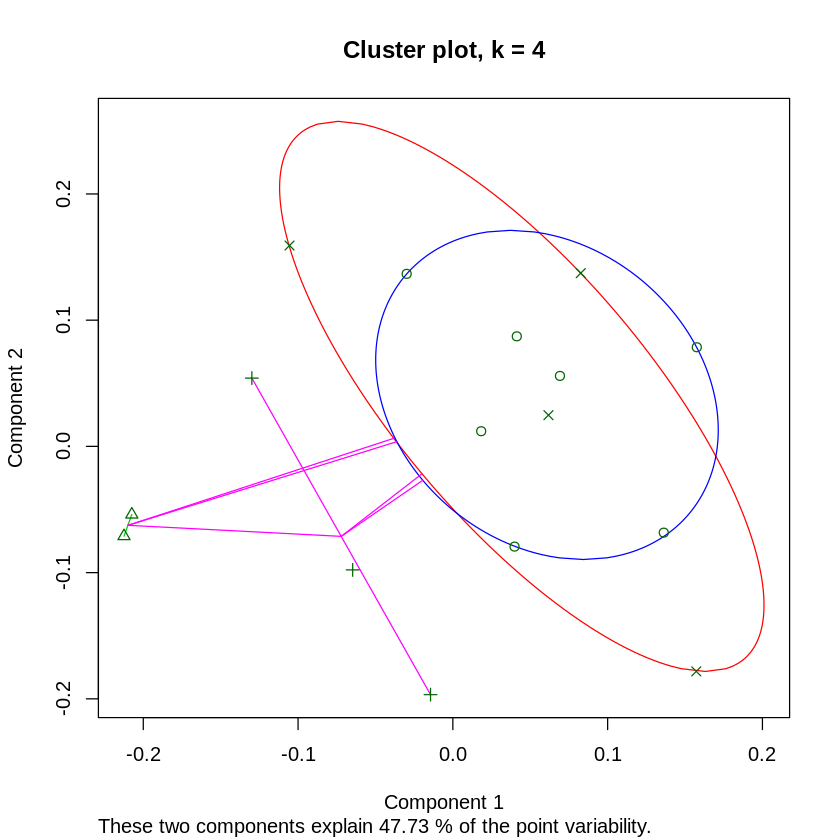

In [116]:
clusplot(pam_fit, main = "Cluster plot, k = 4", 
         color = TRUE)

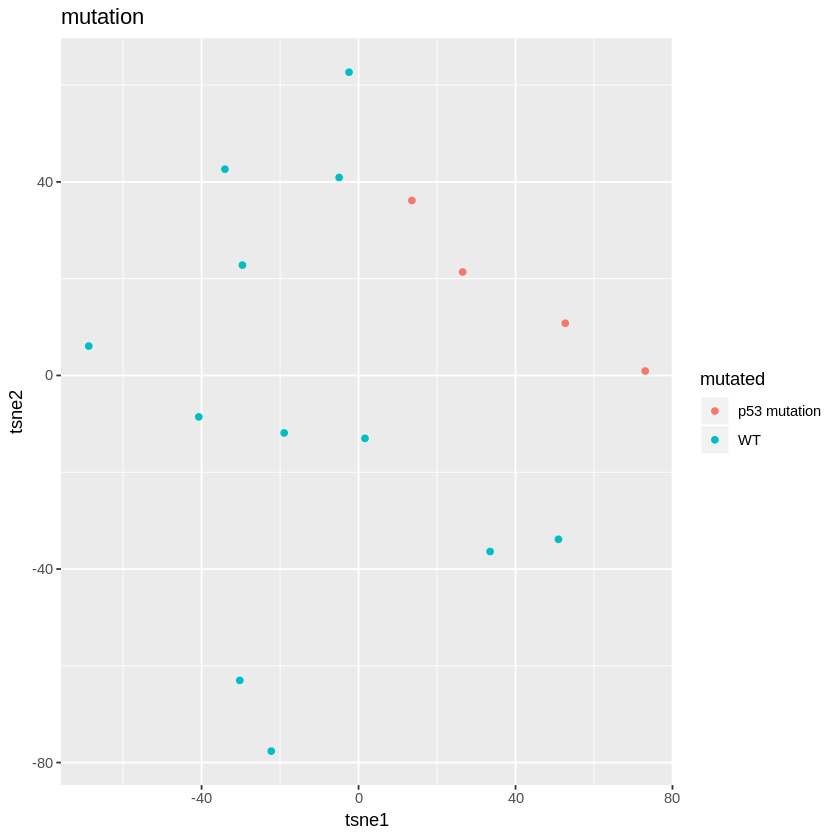

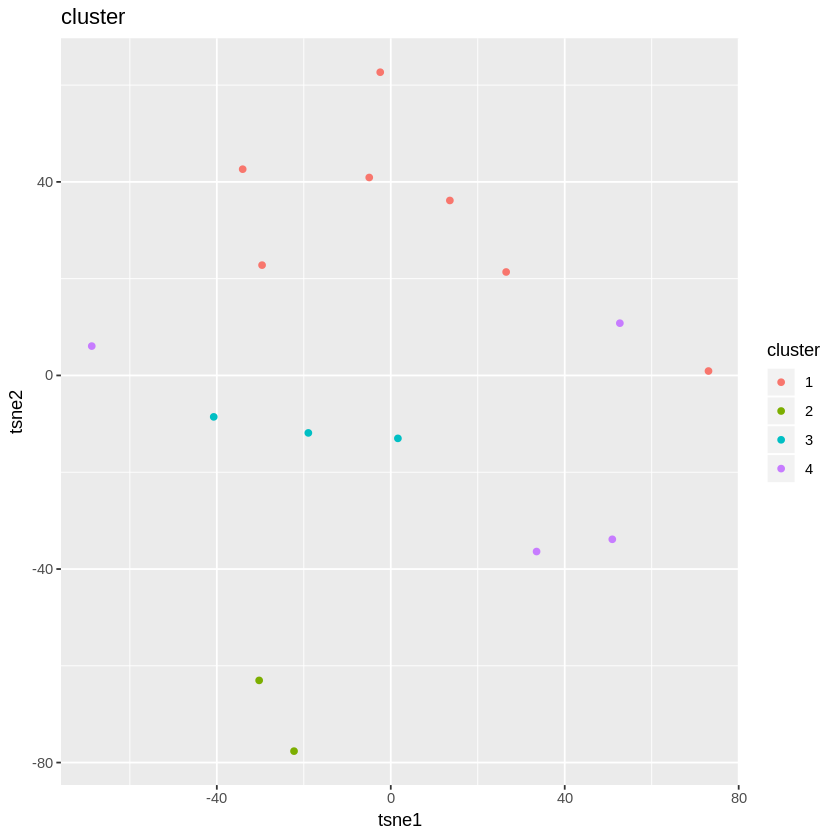

In [102]:
#Visualization in a lower dimensional space

tsne_obj <- Rtsne(gower_dist, is_distance = TRUE,perplexity = 5)

tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("tsne1", "tsne2")) %>%
  mutate(cluster = factor(pam_fit$clustering),
         name = rownames(tordered_data),
        mutated = factor(ifelse(labels(hc_500) %in% mll , "mll-fusion" , ifelse(labels(hc_500) %in% tp53, "p53 mutation", "WT"))))

par(mfrow=c(1,2))
MutPlot = ggplot(aes(x = tsne1, y = tsne2), data = tsne_data) +
  geom_point(aes(color = mutated))
print(MutPlot + ggtitle("mutation"))


ClustPlot = ggplot(aes(x = tsne1, y = tsne2), data = tsne_data) +
  geom_point(aes(color = cluster))
print(ClustPlot + ggtitle("cluster"))

### DE complex vs other subgroup

In [179]:
complex = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[1]),])

mll = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[3]),])

m5_m7 = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[4]),])

m17 = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[5]),])

t6_9 = row.names(API_Adv[which(unfactor(API_Adv$cytogenetic_subgroup)==count_Adv_subgroup$cytogenetic_subgroup[6]),])

In [178]:
read_count = read.table("/home/safia/Documents/AYA/genes_readcount.annotated.xls", header = T, sep="\t")

read_count<- data.frame(read_count[,-1], row.names=read_count[,1])
read_count = read_count[-c(1:4),]
read_count = read_count[,-c(582:585)]
names(read_count) = substring(names(read_count),8)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 2662 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000170689.9,280.68569,8.999873,1.1547993,7.793451,6.520314e-15,1.151746e-10
ENSG00000130528.11,66.97690,-22.099176,2.8571373,-7.734727,1.036255e-14,1.151746e-10
ENSG00000204644.9,426.73695,-24.548897,3.5203946,-6.973337,3.095107e-12,2.293371e-08
ENSG00000163491.16,95.57071,5.336641,0.8169069,6.532740,6.457709e-11,3.588710e-07
ENSG00000082556.10,20.53300,-18.175922,2.8357341,-6.409600,1.459018e-10,5.789709e-07
ENSG00000166923.10,683.20679,-21.838396,3.4127183,-6.399120,1.562745e-10,5.789709e-07


Row.names,groups,sizeFactor,replaceable,gene,expression
1,Cpx,0.8635474,TRUE,ENSG00000170689.9,3.594565
10,Cpx,1.0564057,TRUE,ENSG00000170689.9,6.992601
11,Cpx,0.8734936,TRUE,ENSG00000170689.9,3.710736
12,Cpx,1.1166711,TRUE,ENSG00000170689.9,3.097555
13,Cpx,1.1108890,TRUE,ENSG00000170689.9,3.248201
14,Cpx,0.8437319,TRUE,ENSG00000170689.9,-1.000000


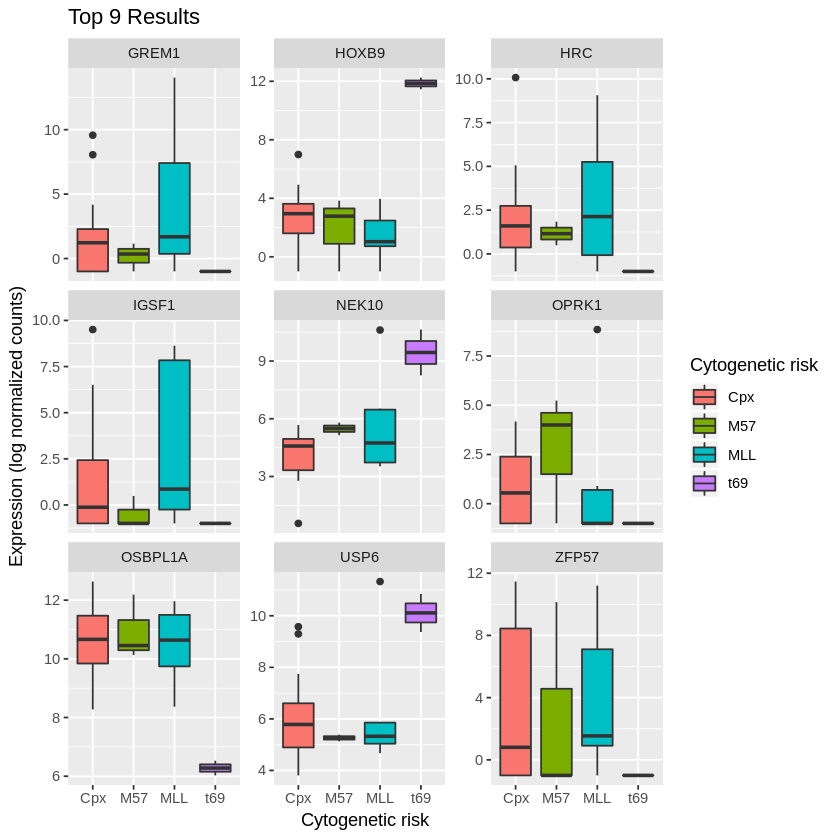

In [180]:
mll = substring(mll,2)
count_mll = read_count[,mll]
colnames(count_mll) = paste("MLL", colnames(count_mll), sep = "_")

complex = substring(complex,2)
count_complex = read_count[,complex]
colnames(count_complex) = paste("Cpx", colnames(count_complex), sep = "_")


m5_m7 = substring(m5_m7,2)
count_m5_m7 = read_count[,m5_m7]
colnames(count_m5_m7) = paste("M57", colnames(count_m5_m7), sep = "_")


t6_9 = substring(t6_9,2)
count_t6_9 = read_count[,t6_9]
colnames(count_t6_9) = paste("t69", colnames(count_t6_9), sep = "_")



df_IF = cbind(count_complex,count_mll,count_m5_m7,count_t6_9)


samples_IF <- data.frame(groups = substr(colnames(df_IF), 1, 3))


ds_IF <- DESeqDataSetFromMatrix(countData=df_IF, colData=samples_IF, design=~groups)
colnames(ds_IF) <- colnames(counts)
ds_IF <-DESeq(ds_IF)
res_IF <- results(ds_IF)


res <- results(ds_IF, tidy=TRUE) %>%
  arrange(padj, pvalue) %>%
  tbl_df()
head(res)

goi <- res$row[1:9]
stopifnot(all(goi %in% names(ds_IF)))


tcounts <- t(log2((counts(ds_IF[goi, ], normalized=TRUE, replaced=FALSE)+.5))) %>%
  merge(colData(ds_IF), ., by="row.names") %>%
  gather(gene, expression, (ncol(.)-length(goi)+1):ncol(.))

head(tcounts)


mart <- useDataset("hsapiens_gene_ensembl", useMart("ensembl"))
genes <- tcounts$gene
genes <- gsub("\\..*","",genes )
G_list <- getBM(filters= "ensembl_gene_id", attributes= c("ensembl_gene_id",
"hgnc_symbol"),values=genes,mart= mart)
for (i in 1:length(genes)){
    if (genes[i] %in% G_list$ensembl_gene_id){
        a = G_list[G_list$ensembl_gene_id == genes[i],]$hgnc_symbol
        if (a != ""){
            tcounts$gene[i] = a
        }
         
    }
}

ggplot(tcounts, aes(groups, expression, fill=groups)) + 
  geom_boxplot() + 
  facet_wrap(~gene, scales="free_y") + 
  labs(x="Cytogenetic risk", 
       y="Expression (log normalized counts)", 
       fill="Cytogenetic risk", 
       title="Top 9 Results")
